In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,accuracy_score
from math import sqrt


In [154]:
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

In [155]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [156]:
recovered.isnull().sum()

Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

In [157]:
recovered["Province/State"] = recovered["Province/State"].fillna(recovered["Country/Region"])

In [158]:
recovered.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
9/17/20           0
9/18/20           0
9/19/20           0
9/20/20           0
9/21/20           0
Length: 248, dtype: int64

In [159]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,Albania,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,Algeria,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,Andorra,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,Angola,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [160]:
recovered.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02
mean,19.835137,27.997068,0.110672,0.118577,0.142292,0.154150,0.205534,0.241107,0.422925,0.498024,...,7.683461e+04,7.756891e+04,7.847586e+04,7.936355e+04,8.026853e+04,8.113512e+04,8.213040e+04,8.307036e+04,8.400322e+04,8.456361e+04
std,24.504550,67.358197,1.760345,1.764332,1.954723,2.020714,2.649732,2.852382,5.059859,5.566071,...,3.738531e+05,3.774536e+05,3.831228e+05,3.886656e+05,3.941652e+05,3.993233e+05,4.045893e+05,4.106165e+05,4.159772e+05,4.178944e+05
min,-51.796300,-106.346800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.428055,-8.224500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.680000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.800000e+02,3.800000e+02
50%,21.521757,23.881300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.991000e+03,1.991000e+03,2.071000e+03,2.094000e+03,2.104000e+03,2.112000e+03,2.128000e+03,2.197000e+03,2.239000e+03,2.369000e+03
75%,39.305400,85.240100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.997900e+04,2.008200e+04,2.120600e+04,2.153600e+04,2.175200e+04,2.266200e+04,2.316000e+04,2.336400e+04,2.336400e+04,2.336400e+04
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,3.723206e+06,3.780107e+06,3.859399e+06,3.942360e+06,4.025079e+06,4.112551e+06,4.208431e+06,4.303043e+06,4.396399e+06,4.396399e+06


In [161]:
recovered.drop(["Country/Region","Lat","Long"],inplace=True,axis=1)

In [162]:
recovered.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,Albania,0,0,0,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,Algeria,0,0,0,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,Andorra,0,0,0,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,Angola,0,0,0,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [163]:
highest_cases = recovered.set_index("Province/State")
highest_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
Albania,0,0,0,0,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
Algeria,0,0,0,0,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
Andorra,0,0,0,0,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
Angola,0,0,0,0,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [164]:
highest_cases = highest_cases.loc[["Hubei","Guangdong","Shanghai","Zhejiang","Afghanistan"]]
highest_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Hubei,28,28,31,32,42,45,80,88,90,141,...,63627,63627,63627,63627,63627,63627,63627,63627,63627,63627
Guangdong,0,2,2,2,2,4,4,5,10,11,...,1749,1751,1755,1757,1760,1764,1767,1767,1771,1774
Shanghai,0,0,1,1,1,3,4,5,5,9,...,890,897,900,904,909,909,910,916,919,923
Zhejiang,0,0,1,1,1,1,3,3,4,14,...,1268,1268,1268,1272,1272,1272,1272,1272,1272,1272
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576


In [165]:
highest_cases = highest_cases.T
highest_cases.head()

Province/State,Hubei,Guangdong,Shanghai,Zhejiang,Afghanistan
1/22/20,28,0,0,0,0
1/23/20,28,2,0,0,0
1/24/20,31,2,1,1,0
1/25/20,32,2,1,1,0
1/26/20,42,2,1,1,0


<AxesSubplot:>

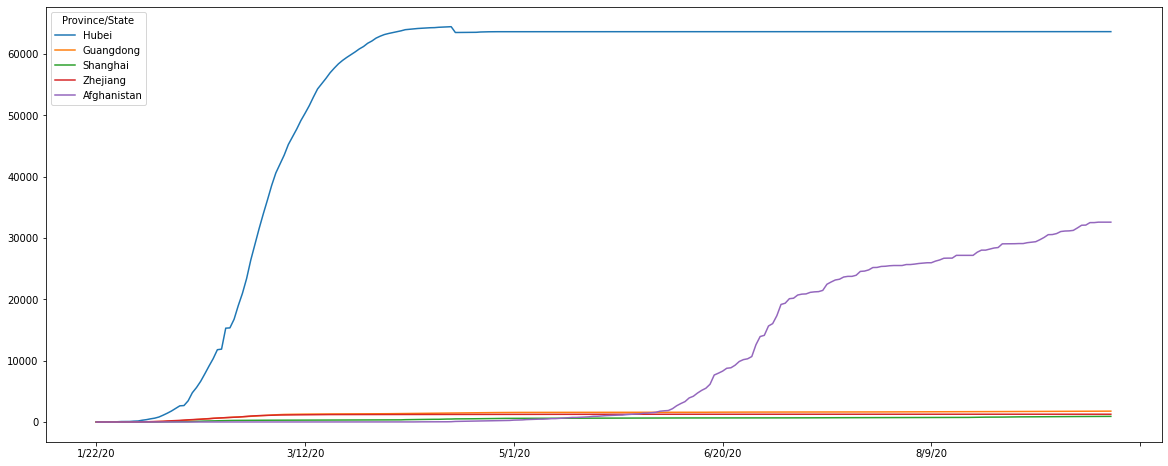

In [166]:
highest_cases.plot(figsize=(20,8))

In [167]:
import statsmodels.api as sm

In [168]:

from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag= 'AIC')
    print("ADF:",dftest[0])
    print("P-value:",dftest[1])
    print("Num of lags used:",dftest[2])
    print("Critical valuues:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

In [169]:
countries = ["Hubei","Guangdong","Shanghai","Zhejiang","Afghanistan"]
ad_test_results=[]
for i in countries:
    ad_test_results.append(ad_test(highest_cases[i]))

ADF: -4.5448435786165335
P-value: 0.0001630330785631643
Num of lags used: 14
Critical valuues:
	 1% : -3.4592326027153493
	 5% : -2.8742454699025872
	 10% : -2.5735414688888465
ADF: -6.530095924666903
P-value: 9.919366043107376e-09
Num of lags used: 13
Critical valuues:
	 1% : -3.459105583381277
	 5% : -2.8741898504150574
	 10% : -2.5735117958412097
ADF: -2.5243917353616276
P-value: 0.10965177946596588
Num of lags used: 12
Critical valuues:
	 1% : -3.4589796764641
	 5% : -2.8741347158661448
	 10% : -2.573482381701992
ADF: -6.553610276950067
P-value: 8.726699191593249e-09
Num of lags used: 9
Critical valuues:
	 1% : -3.4586084859607156
	 5% : -2.873972159235721
	 10% : -2.57339565928848
ADF: -0.6563584950898806
P-value: 0.8577322391102307
Num of lags used: 11
Critical valuues:
	 1% : -3.458854867412691
	 5% : -2.8740800599399323
	 10% : -2.573453223097503


In [170]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pytz>=2017.3 in c:\users\keerthana\appdata\roaming\python\python38\site-packages (from pandas>=0.19->pmdarima) (2020.1)



In [171]:
#highest_cases["Hu_sqrt"] = np.log(highest_cases["Hubei"])
highest_cases["Hu_sqrt_diff"] = highest_cases["Hubei"] - highest_cases["Hubei"].shift(2)

#highest_cases["G_sqrt"] = np.log(highest_cases["Guangdong"])
highest_cases["G_sqrt_diff"] = highest_cases["Guangdong"] - highest_cases["Guangdong"].shift(2)

#highest_cases["S_sqrt"] = np.log(highest_cases["Shanghai"])
highest_cases["S_sqrt_diff"] = highest_cases["Shanghai"] - highest_cases["Shanghai"].shift(2)

#highest_cases["Z_sqrt"] = np.log(highest_cases["Zhejiang"])
highest_cases["Z_sqrt_diff"] = highest_cases["Zhejiang"] - highest_cases["Zhejiang"].shift(2)

#highest_cases["Af_sqrt"]=np.log(highest_cases["Afghanistan"])
highest_cases["Af_sqrt_diff"] = highest_cases["Afghanistan"] - highest_cases["Afghanistan"].shift(2)


In [172]:
highest_cases=highest_cases.replace([np.inf,-np.inf],np.nan).dropna()
highest_cases.head()

Province/State,Hubei,Guangdong,Shanghai,Zhejiang,Afghanistan,Hu_sqrt_diff,G_sqrt_diff,S_sqrt_diff,Z_sqrt_diff,Af_sqrt_diff
1/24/20,31,2,1,1,0,3.0,2.0,1.0,1.0,0.0
1/25/20,32,2,1,1,0,4.0,0.0,1.0,1.0,0.0
1/26/20,42,2,1,1,0,11.0,0.0,0.0,0.0,0.0
1/27/20,45,4,3,1,0,13.0,2.0,2.0,0.0,0.0
1/28/20,80,4,4,3,0,38.0,2.0,3.0,2.0,0.0


In [173]:
ad_test(highest_cases["Hu_sqrt_diff"])
ad_test(highest_cases["G_sqrt_diff"])
ad_test(highest_cases["S_sqrt_diff"])
ad_test(highest_cases["Z_sqrt_diff"])
ad_test(highest_cases["Af_sqrt_diff"])

ADF: -2.9833252796206753
P-value: 0.03648122553247613
Num of lags used: 15
Critical valuues:
	 1% : -3.4596204846395824
	 5% : -2.8744153028455948
	 10% : -2.5736320761218576
ADF: -2.5568020218179837
P-value: 0.10225806353594558
Num of lags used: 15
Critical valuues:
	 1% : -3.4596204846395824
	 5% : -2.8744153028455948
	 10% : -2.5736320761218576
ADF: -3.6054847435964144
P-value: 0.005657032818443068
Num of lags used: 15
Critical valuues:
	 1% : -3.4596204846395824
	 5% : -2.8744153028455948
	 10% : -2.5736320761218576
ADF: -2.8502868555168237
P-value: 0.05144190109377434
Num of lags used: 11
Critical valuues:
	 1% : -3.459105583381277
	 5% : -2.8741898504150574
	 10% : -2.5735117958412097
ADF: -1.713571798325447
P-value: 0.42413379264656215
Num of lags used: 14
Critical valuues:
	 1% : -3.4594900381360034
	 5% : -2.8743581895178485
	 10% : -2.573601605503697


In [174]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [175]:
stepwise_fit = auto_arima(highest_cases["Hu_sqrt_diff"],trace=True,suppress_warnings=True)
stepwise_fit = auto_arima(highest_cases["G_sqrt_diff"],trace=True,suppress_warnings=True)
stepwise_fit = auto_arima(highest_cases["S_sqrt_diff"],trace=True,suppress_warnings=True)
stepwise_fit = auto_arima(highest_cases["Z_sqrt_diff"],trace=True,suppress_warnings=True)
stepwise_fit = auto_arima(highest_cases["Af_sqrt_diff"],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3365.094, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3444.957, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3440.577, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3436.533, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3442.958, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3363.094, Time=1.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3419.523, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3365.094, Time=1.95 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3388.713, Time=0.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3362.657, Time=1.71 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3359.785, Time=1.50 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, T

In [189]:
print(highest_cases.shape)

(242, 15)


In [190]:
train_cases = highest_cases.iloc[:-30]
test_cases = highest_cases.iloc[-30:]
print(train_cases.shape,test_cases.shape)

(212, 15) (30, 15)


In [191]:
highest_cases.head()

Province/State,Hubei,Guangdong,Shanghai,Zhejiang,Afghanistan,Hu_sqrt_diff,G_sqrt_diff,S_sqrt_diff,Z_sqrt_diff,Af_sqrt_diff,S_back_transformed,G_back_transformed,Af_back_transformed,Hu_back_transformed,Z_back_transformed
1/24/20,31,2,1,1,0,3.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,3.0,1.0
1/25/20,32,2,1,1,0,4.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,7.0,2.0
1/26/20,42,2,1,1,0,11.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,18.0,2.0
1/27/20,45,4,3,1,0,13.0,2.0,2.0,0.0,0.0,4.0,4.0,0.0,31.0,2.0
1/28/20,80,4,4,3,0,38.0,2.0,3.0,2.0,0.0,7.0,6.0,0.0,69.0,4.0


<AxesSubplot:>

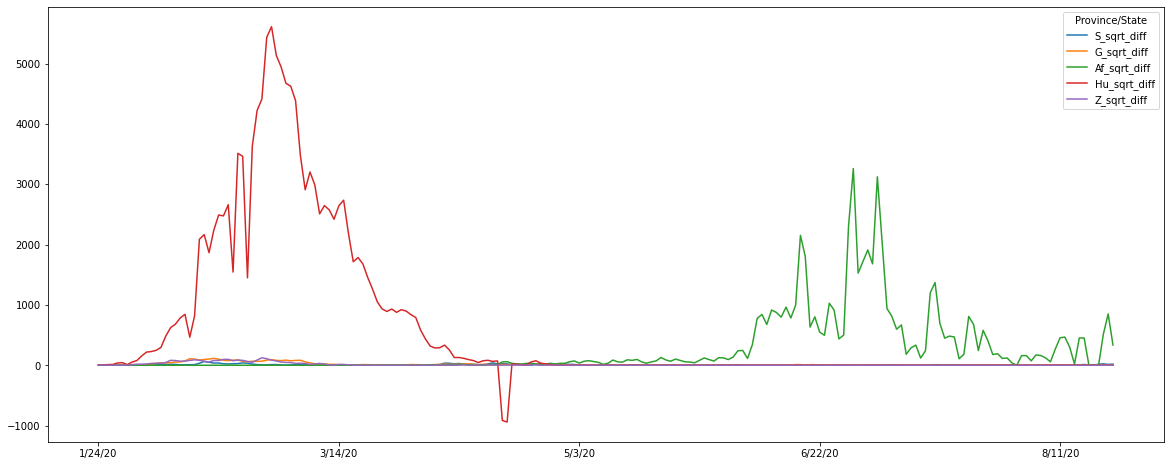

In [193]:
G_model = ARIMA(train_cases["G_sqrt_diff"],order=(3,1,0))
S_model = ARIMA(train_cases["S_sqrt_diff"],order=(0,1,0))
Hu_model = ARIMA(train_cases["Hu_sqrt_diff"],order=(4,1,3))
Z_model = ARIMA(train_cases["Z_sqrt_diff"],order=(0,1,1))
Af_model = ARIMA(train_cases["Af_sqrt_diff"],order=(0,1,0))
G_model= G_model.fit()
S_model = S_model.fit()
Hu_model = Hu_model.fit()
Z_model=Z_model.fit()
Af_model = Af_model.fit()
train_cases.plot(y=["S_sqrt_diff","G_sqrt_diff","Af_sqrt_diff","Hu_sqrt_diff","Z_sqrt_diff"],figsize=(20,8))

In [194]:
start = len(train_cases)
end = len(train_cases)+len(test_cases)-1
S_prediction = S_model.predict(start=start,end=end,typ="levels").rename("Shanghai")
Hu_prediction = Hu_model.predict(start=start,end=end,typ="levels").rename("Hubei")
G_prediction = G_model.predict(start=start,end=end,typ="levels").rename("Guangdong")
Z_prediction = Z_model.predict(start=start,end=end,typ="levels").rename("Zhejiang")
Af_prediction = Af_model.predict(start=start,end=end,typ="levels").rename("Afghanistan")
print("Shanghai")
print(S_prediction)
print("Hubei")
print(Hu_prediction)
print("Guangdong")
print(G_prediction)
print("Zhejiang")
print(Z_prediction)
print("Afghanistan")
print(Af_prediction)

Shanghai
2020-08-23    19.085308
2020-08-24    19.170616
2020-08-25    19.255924
2020-08-26    19.341232
2020-08-27    19.426540
2020-08-28    19.511848
2020-08-29    19.597156
2020-08-30    19.682464
2020-08-31    19.767773
2020-09-01    19.853081
2020-09-02    19.938389
2020-09-03    20.023697
2020-09-04    20.109005
2020-09-05    20.194313
2020-09-06    20.279621
2020-09-07    20.364929
2020-09-08    20.450237
2020-09-09    20.535545
2020-09-10    20.620853
2020-09-11    20.706161
2020-09-12    20.791469
2020-09-13    20.876777
2020-09-14    20.962085
2020-09-15    21.047393
2020-09-16    21.132701
2020-09-17    21.218009
2020-09-18    21.303318
2020-09-19    21.388626
2020-09-20    21.473934
2020-09-21    21.559242
Freq: D, Name: Shanghai, dtype: float64
Hubei
2020-08-23   -8.453632
2020-08-24   -0.413381
2020-08-25   -4.341741
2020-08-26   -4.878921
2020-08-27   -3.600915
2020-08-28   -4.834718
2020-08-29   -4.104680
2020-08-30   -3.688407
2020-08-31   -3.585524
2020-09-01   -3.11

<AxesSubplot:>

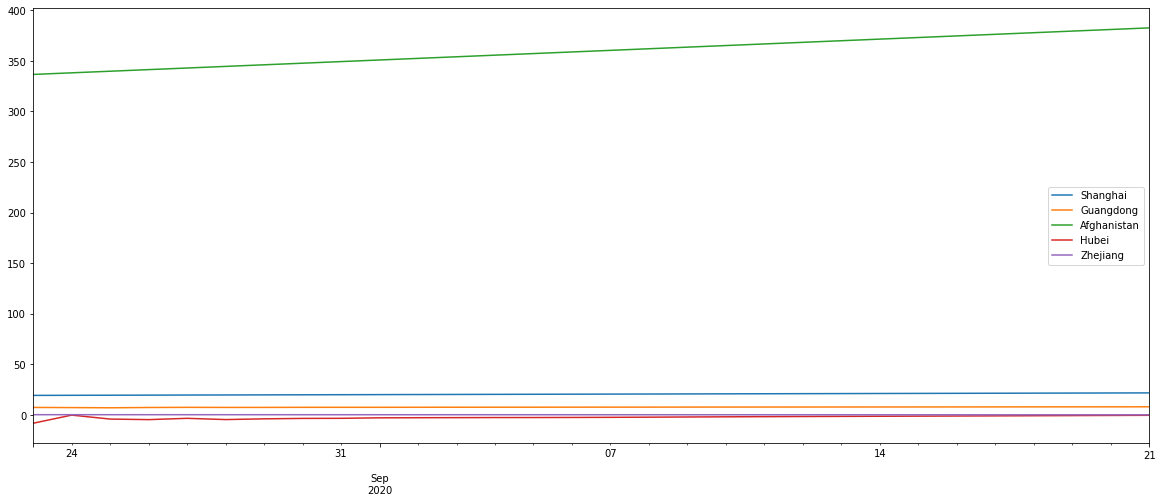

In [195]:
S_prediction.plot(figsize=(20,8),legend=True)
G_prediction.plot(figsize=(20,8),legend=True)
Af_prediction.plot(figsize=(20,8),legend=True)
Hu_prediction.plot(figsize=(20,8),legend=True)
Z_prediction.plot(figsize=(20,8),legend=True)

In [196]:
print(sqrt(mean_squared_error(S_prediction,test_cases["S_sqrt_diff"])))
print(sqrt(mean_squared_error(G_prediction,test_cases["G_sqrt_diff"])))
print(sqrt(mean_squared_error(Af_prediction,test_cases["Af_sqrt_diff"])))
print(sqrt(mean_squared_error(Af_prediction,test_cases["Hu_sqrt_diff"])))
print(sqrt(mean_squared_error(Af_prediction,test_cases["Z_sqrt_diff"])))

12.335051190292994
3.7328036428435887
257.949547251611
359.8070513766667
359.59583965603497


In [197]:
S_final_model = ARIMA(highest_cases["S_sqrt_diff"],order=(0,1,0))
S_final_model = S_final_model.fit()
G_final_model = ARIMA(highest_cases["G_sqrt_diff"],order=(3,1,0))
G_final_model = G_final_model.fit()
Af_final_model = ARIMA(highest_cases["Af_sqrt_diff"],order=(0,1,0))
Af_final_model = Af_final_model.fit()
Hu_final_model = ARIMA(highest_cases["Hu_sqrt_diff"],order=(4,1,3))
Hu_final_model = Hu_final_model.fit()
Z_final_model = ARIMA(highest_cases["Z_sqrt_diff"],order=(0,1,1))
Z_final_model = Z_final_model.fit()
highest_cases.tail()

Province/State,Hubei,Guangdong,Shanghai,Zhejiang,Afghanistan,Hu_sqrt_diff,G_sqrt_diff,S_sqrt_diff,Z_sqrt_diff,Af_sqrt_diff,S_back_transformed,G_back_transformed,Af_back_transformed,Hu_back_transformed,Z_back_transformed
9/17/20,63627,1764,909,1272,32505,0.0,7.0,5.0,0.0,407.0,1818.0,3522.0,65008.0,127198.0,2544.0
9/18/20,63627,1767,910,1272,32576,0.0,7.0,1.0,0.0,73.0,1819.0,3529.0,65081.0,127198.0,2544.0
9/19/20,63627,1767,916,1272,32576,0.0,3.0,7.0,0.0,71.0,1826.0,3532.0,65152.0,127198.0,2544.0
9/20/20,63627,1771,919,1272,32576,0.0,4.0,9.0,0.0,0.0,1835.0,3536.0,65152.0,127198.0,2544.0
9/21/20,63627,1774,923,1272,32576,0.0,7.0,7.0,0.0,0.0,1842.0,3543.0,65152.0,127198.0,2544.0


In [198]:
future_dates = pd.date_range(start='2020-09-21',end='2020-10-21')
S_final_prediction = S_final_model.predict(start=len(highest_cases),end=len(highest_cases)+30,typ='levels').rename('Shanghai')
G_final_prediction = G_final_model.predict(start=len(highest_cases),end=len(highest_cases)+30,typ='levels').rename('Guangdong')
Af_final_prediction = Af_final_model.predict(start=len(highest_cases),end=len(highest_cases)+30,typ='levels').rename('Afghanistan')
Hu_final_prediction = Hu_final_model.predict(start=len(highest_cases),end=len(highest_cases)+30,typ='levels').rename('Hubei')
Z_final_prediction = Z_final_model.predict(start=len(highest_cases),end=len(highest_cases)+30,typ='levels').rename('Zhejiang')
print(S_final_prediction)
print(G_final_prediction)
print(Af_final_prediction)
print(Hu_final_prediction)
print(Z_final_prediction)

2020-09-22    7.024896
2020-09-23    7.049793
2020-09-24    7.074689
2020-09-25    7.099585
2020-09-26    7.124481
2020-09-27    7.149378
2020-09-28    7.174274
2020-09-29    7.199170
2020-09-30    7.224066
2020-10-01    7.248963
2020-10-02    7.273859
2020-10-03    7.298755
2020-10-04    7.323651
2020-10-05    7.348548
2020-10-06    7.373444
2020-10-07    7.398340
2020-10-08    7.423236
2020-10-09    7.448133
2020-10-10    7.473029
2020-10-11    7.497925
2020-10-12    7.522821
2020-10-13    7.547718
2020-10-14    7.572614
2020-10-15    7.597510
2020-10-16    7.622407
2020-10-17    7.647303
2020-10-18    7.672199
2020-10-19    7.697095
2020-10-20    7.721992
2020-10-21    7.746888
2020-10-22    7.771784
Freq: D, Name: Shanghai, dtype: float64
2020-09-22    6.724972
2020-09-23    5.873927
2020-09-24    6.410994
2020-09-25    6.825816
2020-09-26    6.594908
2020-09-27    6.520263
2020-09-28    6.686327
2020-09-29    6.726316
2020-09-30    6.680312
2020-10-01    6.705421
2020-10-02    6.7

<AxesSubplot:>

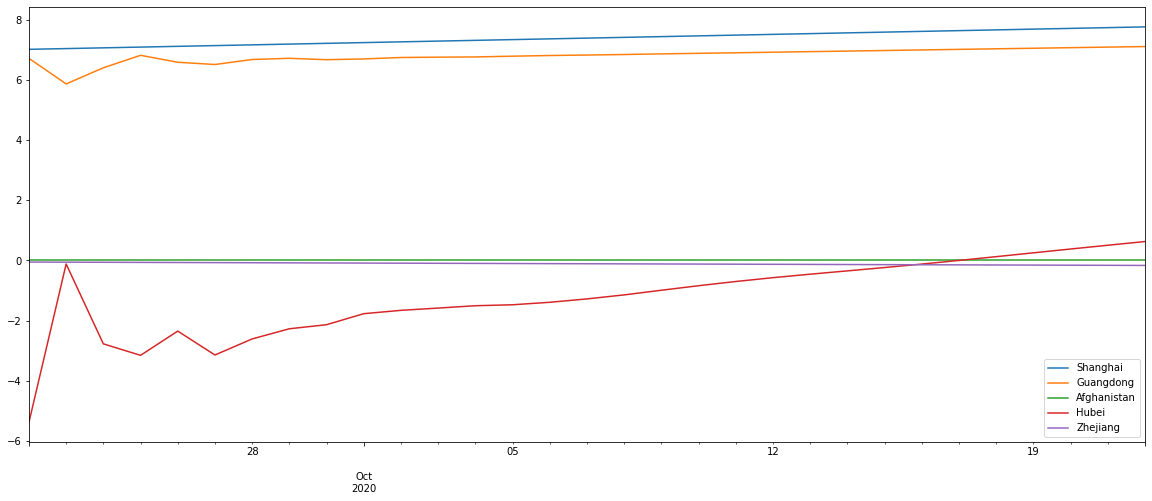

In [199]:
S_final_prediction.plot(figsize=(20,8),legend=True)
G_final_prediction.plot(figsize=(20,8),legend=True)
Af_final_prediction.plot(figsize=(20,8),legend=True)
Hu_final_prediction.plot(figsize=(20,8),legend=True)
Z_final_prediction.plot(figsize=(20,8),legend=True)

In [200]:
S_back_trans = np.cumsum(highest_cases["S_sqrt_diff"])
highest_cases["S_back_transformed"] = S_back_trans
G_back_trans = np.cumsum(highest_cases["G_sqrt_diff"])
highest_cases["G_back_transformed"] = G_back_trans
Af_back_trans = np.cumsum(highest_cases["Af_sqrt_diff"])
highest_cases["Af_back_transformed"] = Af_back_trans
Hu_back_trans = np.cumsum(highest_cases["Hu_sqrt_diff"])
highest_cases["Hu_back_transformed"] = Hu_back_trans
Z_back_trans = np.cumsum(highest_cases["Z_sqrt_diff"])
highest_cases["Z_back_transformed"] = Z_back_trans
highest_cases.head()

Province/State,Hubei,Guangdong,Shanghai,Zhejiang,Afghanistan,Hu_sqrt_diff,G_sqrt_diff,S_sqrt_diff,Z_sqrt_diff,Af_sqrt_diff,S_back_transformed,G_back_transformed,Af_back_transformed,Hu_back_transformed,Z_back_transformed
1/24/20,31,2,1,1,0,3.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,3.0,1.0
1/25/20,32,2,1,1,0,4.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,7.0,2.0
1/26/20,42,2,1,1,0,11.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,18.0,2.0
1/27/20,45,4,3,1,0,13.0,2.0,2.0,0.0,0.0,4.0,4.0,0.0,31.0,2.0
1/28/20,80,4,4,3,0,38.0,2.0,3.0,2.0,0.0,7.0,6.0,0.0,69.0,4.0


In [201]:
S_final = ARIMA(highest_cases["S_back_transformed"],order=(0,1,0))
S_final_fit = S_final.fit(disp=0)
G_final = ARIMA(highest_cases["G_back_transformed"],order=(3,1,0))
G_final_fit = G_final.fit(disp=0)
Af_final = ARIMA(highest_cases["Af_back_transformed"],order=(0,1,0))
Af_final_fit = Af_final.fit(disp=0)
Hu_final = ARIMA(highest_cases["Hu_back_transformed"],order=(4,1,3))
Hu_final_fit = Hu_final.fit(disp=0)
Z_final = ARIMA(highest_cases["Z_back_transformed"],order=(0,1,1))
Z_final_fit = Z_final.fit(disp=0)

<AxesSubplot:>

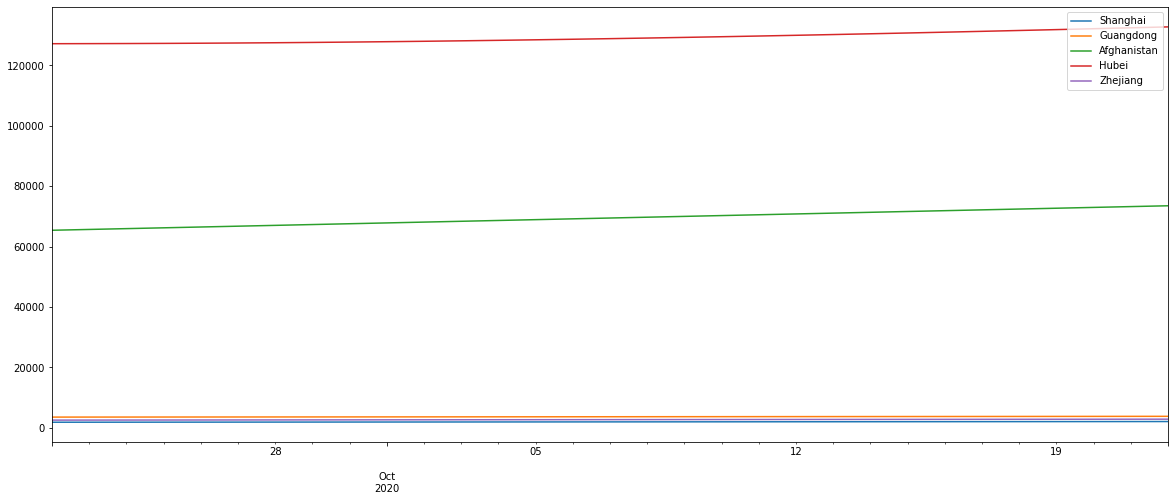

In [202]:
S_back_prediction = S_final_fit.predict(start=len(highest_cases),end=len(highest_cases)+30,typ="levels").rename("Shanghai")
S_back_prediction.plot(figsize=(20,8),legend=True)
G_back_prediction = G_final_fit.predict(start=len(highest_cases),end=len(highest_cases)+30,typ="levels").rename("Guangdong")
G_back_prediction.plot(figsize=(20,8),legend=True)
Af_back_prediction = Af_final_fit.predict(start=len(highest_cases),end=len(highest_cases)+30,typ="levels").rename("Afghanistan")
Af_back_prediction.plot(figsize=(20,8),legend=True)
Hu_back_prediction = Hu_final_fit.predict(start=len(highest_cases),end=len(highest_cases)+30,typ="levels").rename("Hubei")
Hu_back_prediction.plot(figsize=(20,8),legend=True)
Z_back_prediction = Z_final_fit.predict(start=len(highest_cases),end=len(highest_cases)+30,typ="levels").rename("Zhejiang")
Z_back_prediction.plot(figsize=(20,8),legend=True)